### Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

Estimation Statistics is a branch of statistics that deals with using sample data to estimate parameters of a population. There are two main types of estimates:

#### 1.Point Estimate: A single value that serves as the best estimate of an unknown population parameter.
#### 2.Interval Estimate: A range of values that is likely to contain the population parameter with a certain level of confidence.

In [1]:
# Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

import math

def estimate_population_mean(sample_mean, sample_std_dev, sample_size):
    # Calculate the standard error of the mean
    standard_error = sample_std_dev / math.sqrt(sample_size)
    
    # Calculate the margin of error (for a 95% confidence interval, z-score is 1.96)
    z_score = 1.96
    margin_of_error = z_score * standard_error
    
    # Calculate the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound

# Example usage
sample_mean = 50
sample_std_dev = 10
sample_size = 30

lower_bound, upper_bound = estimate_population_mean(sample_mean, sample_std_dev, sample_size)
print(f"Estimated population mean is between {lower_bound:.2f} and {upper_bound:.2f}")


Estimated population mean is between 46.42 and 53.58


### Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

#### Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It involves formulating two competing hypotheses: the null hypothesis (H₀), which represents no effect or no difference, and the alternative hypothesis (H₁), which represents an effect or a difference.


#### Hypothesis testing is used to:

##### 1.Evaluate Claims: It helps in assessing the validity of claims or theories based on sample data.
##### 2.Make Decisions: It provides a structured framework for making decisions in the presence of uncertainty.
##### 3.Test Relationships: It is used to test relationships between variables and determine if observed patterns are statistically significant.

#### Importance of Hypothesis Testing
##### 1.Scientific Research: It is fundamental in scientific research for testing theories and hypotheses.
##### 2.Data-Driven Decisions: It enables data-driven decision-making, reducing reliance on intuition or guesswork.
##### 3.Error Minimization: It helps in minimizing Type I (false positive) and Type II (false negative) errors.
##### 4.Generalization: It allows researchers to generalize findings from a sample to a larger population.
##### 5.Hypothesis testing is widely used in various fields such as medical research, social sciences, and business analysis to ensure that conclusions drawn from data are reliable and valid

#### Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

##### Null Hypothesis (H0): The average weight of male college students is equal to or less than the average weight of female college students.
##### Alternative Hypothesis (H1): The average weight of male college students is greater than the average weight of female college students.
Mathematically:
H0: μm ≤ μf
H1: μm > μf
Where μm is the population mean weight of male college students and μf is the population mean weight of female college students.

In [2]:
## Q5. Write a Python script to conduct a hypothesis test on the difference between two population means,
## given a sample from each population.

import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    # Calculate sample statistics
    n1, n2 = len(sample1), len(sample2)
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    
    # Calculate pooled standard deviation
    pooled_se = np.sqrt(var1/n1 + var2/n2)
    
    # Calculate t-statistic
    t_stat = (mean1 - mean2) / pooled_se
    
    # Calculate degrees of freedom using Welch–Satterthwaite equation
    df = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
    
    # Calculate p-value
    p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2
    
    # Make decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return t_stat, df, p_value, decision

# Example usage
sample1 = [25, 28, 30, 32, 33, 35, 37, 39]
sample2 = [22, 24, 26, 28, 30, 32, 34, 36]

t_stat, df, p_value, decision = two_sample_t_test(sample1, sample2)

print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")
print(f"Decision: {decision}")


T-statistic: 1.4121396302374711
Degrees of freedom: 13.964513378426172
P-value: 0.17980411390580087
Decision: Fail to reject the null hypothesis


## Q6: What is a null and alternative hypothesis? Give some examples.

A null hypothesis (H0) and alternative hypothesis (H1) are two competing statements about a population parameter in hypothesis testing.

Null Hypothesis (H0):

--States that there is no significant difference or effect
--Assumes the status quo
--What we're trying to disprove


Alternative Hypothesis (H1):

--States that there is a significant difference or effect
--Represents the research question or claim
--What we're trying to prove



Examples:

Testing a new drug:
H0: The new drug has no effect on blood pressure
H1: The new drug reduces blood pressure
Comparing test scores:
H0: The mean test scores of two groups are equal
H1: The mean test scores of two groups are different
Checking manufacturing quality:
H0: The mean weight of products is 100g
H1: The mean weight of products is not 100g
Evaluating a marketing campaign:
H0: The new campaign does not increase sales
H1: The new campaign increases sales

## Q7: Write down the steps involved in hypothesis testing.

The steps involved in hypothesis testing are:

### 1.Formulate the null (H0) and alternative (H1) hypotheses
### 2.Choose a significance level (α)
### 3.Select the appropriate test statistic
### 4.Determine the critical region or p-value
### 5.Collect sample data and calculate the test statistic
### 6.Compare the test statistic with the critical value or p-value
### 7.Make a decision to reject or fail to reject the null hypothesis
### 8.Interpret the results in the context of the problem

## Q8. Define p-value and explain its significance in hypothesis testing.

A p-value is the probability of obtaining test results at least as extreme as the observed results, assuming that the null hypothesis is true. In hypothesis testing, the p-value is used to quantify the strength of evidence against the null hypothesis.
Significance in hypothesis testing:

#### 1.It helps in decision-making: If the p-value is less than the chosen significance level (α), we reject the null hypothesis.
#### 2.Measures evidence: Smaller p-values indicate stronger evidence against the null hypothesis.
#### 3.Quantifies uncertainty: It represents the probability of making a Type I error (rejecting a true null hypothesis).

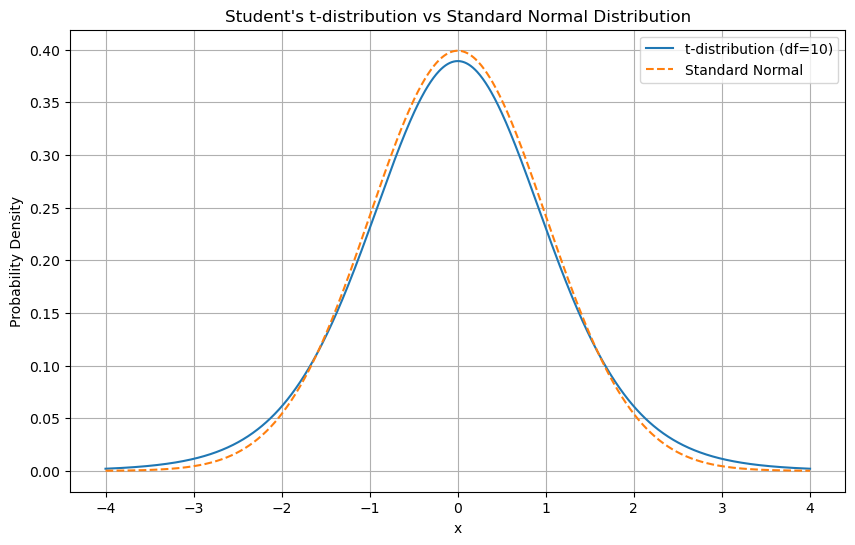

In [3]:
## Q9. Generate a Student's t-distribution plot using Python's matplotlib library, 
## with the degrees of freedom parameter set to 10.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_t_distribution(df):
    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, df)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f't-distribution (df={df})')
    plt.plot(x, stats.norm.pdf(x), label='Standard Normal', linestyle='--')
    plt.title("Student's t-distribution vs Standard Normal Distribution")
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate plot with df = 10
plot_t_distribution(10)

In [4]:
##Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two
## random samples of equal size and a null hypothesis that the population means are equal.
import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    # Calculate sample statistics
    n1, n2 = len(sample1), len(sample2)
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    
    # Calculate pooled standard deviation
    pooled_sd = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Calculate t-statistic
    t_stat = (mean1 - mean2) / (pooled_sd * np.sqrt(2/n1))
    
    # Calculate degrees of freedom
    df = 2 * n1 - 2
    
    # Calculate p-value
    p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2
    
    # Make decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return t_stat, df, p_value, decision

# Example usage
np.random.seed(42)
sample1 = np.random.normal(loc=10, scale=2, size=30)
sample2 = np.random.normal(loc=11, scale=2, size=30)

t_stat, df, p_value, decision = two_sample_t_test(sample1, sample2)

print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")
print(f"Decision: {decision}")

T-statistic: -2.398115152010244
Degrees of freedom: 58
P-value: 0.019717941865758037
Decision: Reject the null hypothesis


In [6]:
## Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50. 
# Estimate the population mean revenue with a 95% confidence interval.

import math

def estimate_population_mean_confidence_interval(sample_mean, sample_std_dev, sample_size, confidence_level=0.95):
    # Calculate the standard error
    standard_error = sample_std_dev / math.sqrt(sample_size)
    
    # Z-score for 95% confidence level
    z_score = 1.96
    
    # Calculate the margin of error
    margin_of_error = z_score * standard_error
    
    # Calculate the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound

# Example usage
sample_mean = 500
sample_std_dev = 50
sample_size = 50

lower_bound, upper_bound = estimate_population_mean_confidence_interval(sample_mean, sample_std_dev, sample_size)
print(f"Estimated population mean revenue is between ${lower_bound:.2f} and ${upper_bound:.2f}")


Estimated population mean revenue is between $486.14 and $513.86


In [7]:
### Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. 
## They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg 
## with a standard deviation of 3 mmHg. 
## Test the hypothesis with a significance level of 0.05.

import scipy.stats as stats

# Given data
sample_mean = 8
hypothesized_mean = 10
sample_std_dev = 3
sample_size = 100

# Calculate the test statistic
standard_error = sample_std_dev / (sample_size ** 0.5)
t_statistic = (sample_mean - hypothesized_mean) / standard_error

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=sample_size-1))

# Output the results
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.5f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


t-statistic: -6.67
p-value: 0.00000
Reject the null hypothesis.


In [8]:
## Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. 
# Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

import scipy.stats as stats

def one_sample_t_test(sample_mean, sample_std, sample_size, hypothesized_mean, alpha, alternative='two-sided'):
    t_stat = (sample_mean - hypothesized_mean) / (sample_std / (sample_size ** 0.5))
    degrees_of_freedom = sample_size - 1
    
    if alternative == 'less':
        p_value = stats.t.cdf(t_stat, degrees_of_freedom)
    elif alternative == 'greater':
        p_value = 1 - stats.t.cdf(t_stat, degrees_of_freedom)
    else:  # two-sided
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), degrees_of_freedom))
    
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return t_stat, p_value, decision

sample_mean = 4.8
population_std = 0.5
sample_size = 25
hypothesized_mean = 5
alpha = 0.01

t_stat, p_value, decision = one_sample_t_test(sample_mean, population_std, sample_size, hypothesized_mean, alpha, alternative='less')

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")


T-statistic: -2.0000
P-value: 0.0285
Decision: Fail to reject the null hypothesis


In [9]:
## Q16. Two groups of students are given different study materials to prepare for a test. 
# The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, 
# and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. 
#Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

import scipy.stats as stats
import math

def two_sample_t_test(mean1, std1, n1, mean2, std2, n2, alpha):
    # Calculate pooled standard deviation
    s_p = math.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    # Calculate t-statistic
    t_stat = (mean1 - mean2) / (s_p * math.sqrt(1/n1 + 1/n2))
    
    # Calculate degrees of freedom
    df = n1 + n2 - 2
    
    # Calculate p-value (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    
    # Make decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return t_stat, df, p_value, decision

mean1, std1, n1 = 80, 10, 30
mean2, std2, n2 = 75, 8, 40
alpha = 0.01

t_stat, df, p_value, decision = two_sample_t_test(mean1, std1, n1, mean2, std2, n2, alpha)

print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")

T-statistic: 2.3240
Degrees of freedom: 68
P-value: 0.0231
Decision: Fail to reject the null hypothesis


In [10]:
## Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. 
# They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. 
# Estimate the population mean with a 99% confidence interval.

import scipy.stats as stats

def confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    degrees_of_freedom = sample_size - 1
    t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
    margin_of_error = t_value * (sample_std / (sample_size ** 0.5))
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return (lower_bound, upper_bound)

sample_mean = 4
sample_std = 1.5
sample_size = 50
confidence_level = 0.99

ci = confidence_interval(sample_mean, sample_std, sample_size, confidence_level)
print(f"99% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")

99% Confidence Interval: (3.43, 4.57)
